In [0]:
! pip install comet-ml

In [0]:
! git clone https://github.com/dudeperf3ct/TextRecognizer.git

In [0]:
%cd TextRecognizer/Experiment-1/notebooks

/content/TextRecognizer/Experiment-1/notebooks


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import logging
import absl.logging
logging.root.removeHandler(absl.logging._absl_handler)
absl.logging._warn_preinit_stderr = False
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [0]:
import sys
sys.path.append('..')

In [0]:
from src.data.emnist_dataset import EMNIST
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from collections import defaultdict

In [0]:
dataset = EMNIST()
(x_train, y_train), (x_test, y_test) = dataset.load_data()

0.00B [00:00, ?B/s]

[INFO] Downloading raw dataset...


709MB [00:10, 70.5MB/s]                           


[INFO] Download complete..
[INFO] Unzipping raw dataset...
[INFO] Unzipping complete
[INFO] Loading training and test data from .mat file...
[INFO] Balancing classes to reduce amount of data...
[INFO] Saving to HDF5 in a compressed format...
[INFO] Saving essential dataset parameters...
[INFO] Cleaning up...


In [0]:
print(dataset)
print('Training shape:', x_train.shape, y_train.shape)
print('Test shape:', x_test.shape, y_test.shape)

EMNIST Dataset
Num classes: 62
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}
Input shape: [28, 28]

Training shape: (336299, 28, 28) (336299, 62)
Test shape: (55789, 28, 28) (55789, 62)


## EDA

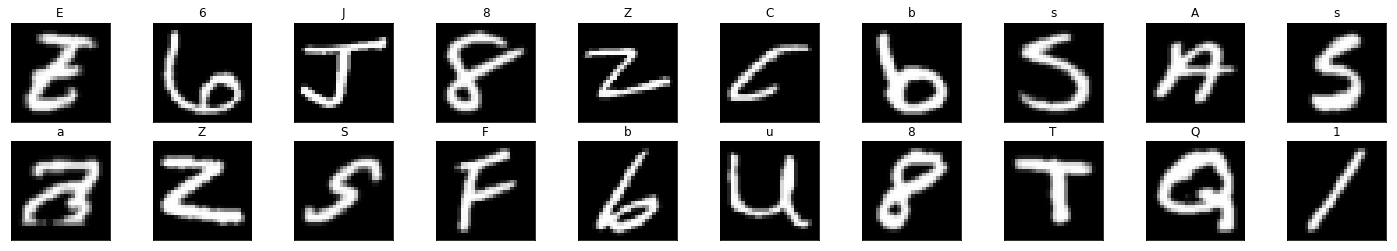

In [0]:
classes = dataset.mapping
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
rnd_ind = np.random.randint(low=0, high=len(x_train), size=20)

for idx, i in enumerate(rnd_ind):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(classes[np.where(y_train[i]==1)[0][0]]))

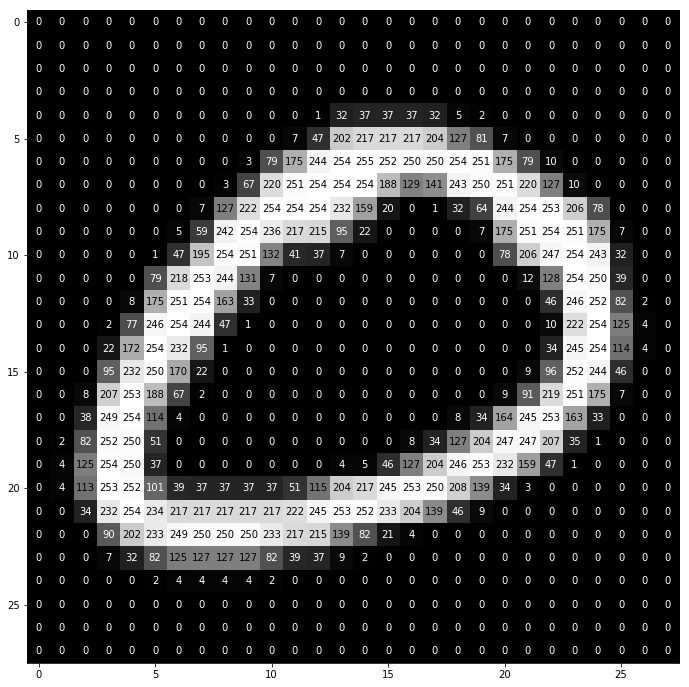

In [0]:
img = x_train[1]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [0]:
def distribution(labels, classes):
    
    lbl_dist = dict.fromkeys(value for key,value in classes.items())
    lbl_dist = defaultdict(lambda:1)
    for idx in tqdm(range(len(labels))):
        lbl_dist[classes[np.where(labels[idx]==1)[0][0]]] += 1
    return lbl_dist

In [0]:
distribution(y_train, classes)

100%|██████████| 336299/336299 [00:00<00:00, 387963.61it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>>,
            {'0': 9635,
             '1': 9712,
             '2': 9584,
             '3': 9612,
             '4': 9627,
             '5': 9446,
             '6': 9567,
             '7': 9627,
             '8': 9587,
             '9': 9570,
             'A': 5333,
             'B': 3670,
             'C': 6828,
             'D': 4191,
             'E': 4414,
             'F': 6458,
             'G': 2488,
             'H': 3064,
             'I': 7267,
             'J': 3565,
             'K': 2439,
             'L': 4539,
             'M': 6416,
             'N': 6144,
             'O': 9159,
             'P': 6210,
             'Q': 2577,
             'R': 4526,
             'S': 8660,
             'T': 6737,
             'U': 7463,
             'V': 4240,
             'W': 4285,
             'X': 2714,
             'Y': 4304,
             'Z': 2660,
             'a': 6757,
             'b': 4566,
             'c': 2793,


In [0]:
distribution(y_test, classes)

100%|██████████| 55789/55789 [00:00<00:00, 358730.05it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>>,
            {'0': 1603,
             '1': 1605,
             '2': 1573,
             '3': 1598,
             '4': 1613,
             '5': 1563,
             '6': 1602,
             '7': 1603,
             '8': 1611,
             '9': 1624,
             'A': 883,
             'B': 619,
             'C': 1145,
             'D': 713,
             'E': 750,
             'F': 1037,
             'G': 439,
             'H': 504,
             'I': 1219,
             'J': 598,
             'K': 381,
             'L': 738,
             'M': 1053,
             'N': 1016,
             'O': 1476,
             'P': 1014,
             'Q': 412,
             'R': 725,
             'S': 1441,
             'T': 1104,
             'U': 1234,
             'V': 732,
             'W': 739,
             'X': 429,
             'Y': 717,
             'Z': 456,
             'a': 1110,
             'b': 759,
             'c': 428,
             'd': 

In [24]:
%%writefile ../src/training/util.py

"""Function to train a model."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time
#from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from src.data.dataset import Dataset
from src.models.base_model import Model
from pathlib import Path
import numpy as np
import sys
sys.path.append(str(Path(__file__).resolve().parents[2]))
from src.visualization.visualize import plot_loss, plot_acc, save_model
from src.training.clr_callback import CyclicLR
from src.training.lr_find import LearningRateFinder
import matplotlib.pyplot as plt

EARLY_STOPPING = True
CYCLIC_LR = True
# adjust min_lr and max_lr after plotting lr_find
MIN_LR = 1e-5
MAX_LR = 1e-3
STEP_SIZE = 8
MODE = "triangular2"
SAVE_LR_PLOT = '../models/'

def train_model(
        model: Model,
        dataset: Dataset,
        epochs: int,
        batch_size: int,
        name : str,
        FIND_LR : bool = False) -> Model:
    """Train model."""
    callbacks = []

    if FIND_LR :
        # initialize the learning rate finder and then train with learning
        # rates ranging from 1e-10 to 1e+1
        print("[INFO] finding learning rate...")
        lrf = LearningRateFinder(model)
        lrf.find(
            dataset,
            1e-10, 
            1e+1,
            stepsPerEpoch=np.ceil((len(dataset['x_train']) / float(batch_size))),
            batchSize=batch_size)

        # plot the loss for the various learning rates and save the
        # resulting plot to disk
        lrf.plot_loss(name)
 
        # gracefully exit the script so we can adjust our learning rates
        # in the config and then train the network for our full set of
        # epochs
        print("[INFO] learning rate finder complete")
        print("[INFO] examine plot and adjust learning rates before training")
        sys.exit(0)

    else:
        if EARLY_STOPPING:
            early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, 
                            patience=3, verbose=1, restore_best_weights=True)
            callbacks.append(early_stopping)

        if CYCLIC_LR:
            cyclic_lr = CyclicLR(base_lr=MIN_LR, max_lr=MAX_LR,
                                step_size=STEP_SIZE * (dataset['x_train'].shape[0] // batch_size), 
                                mode=MODE)
            callbacks.append(cyclic_lr)

        model.network.summary()

        t = time.time()
        _history = model.fit(dataset=dataset, 
                            batch_size=batch_size, 
                            epochs=epochs, 
                            callbacks=callbacks,
                            lr=MIN_LR)
        print('[INFO] Training took {:2f} s'.format(time.time() - t))

        plot_history(_history, name)
        save_model(model.network, name)

        return model





Overwriting ../src/training/util.py


In [0]:
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(42)

## Training

In [0]:
! python ../src/training/train_model.py -b 2048 -n lenet -find_lr True

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (336299, 28, 28) (336299, 62)
[INFO] Validation shape:  (5579, 28, 28) (5579, 62)
[INFO] Test shape:  (50210, 28, 28) (50210, 62)
[INFO] Setting up the model..
W0809 07:44:42.954655 140174035396480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 07:44:42.969026 140174035396480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 07:44:42.975381 140174035396480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 07:44:43.004262 140174035396480 deprecatio

In [0]:
#without using cylic lr
! python ../src/training/train_model.py -b 2048 -e 50 -n lenet

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (336299, 28, 28) (336299, 62)
[INFO] Validation shape:  (5579, 28, 28) (5579, 62)
[INFO] Test shape:  (50210, 28, 28) (50210, 62)
[INFO] Setting up the model..
W0808 17:32:28.820773 139684350019456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 17:32:28.831486 139684350019456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 17:32:28.836225 139684350019456 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 17:32:28.857489 139684350019456 deprecatio

In [17]:
#1e-4 1e-3 with cyclic lr
! python ../src/training/train_model.py -b 2048 -e 50 -n lenet

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (336299, 28, 28) (336299, 62)
[INFO] Validation shape:  (5579, 28, 28) (5579, 62)
[INFO] Test shape:  (50210, 28, 28) (50210, 62)
[INFO] Setting up the model..
W0809 08:05:03.112454 140527443179392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 08:05:03.126569 140527443179392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 08:05:03.133102 140527443179392 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 08:05:03.162273 140527443179392 deprecatio

In [18]:
! python ../src/training/train_model.py -b 2048 -n resnet -find_lr True

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (336299, 28, 28) (336299, 62)
[INFO] Validation shape:  (5579, 28, 28) (5579, 62)
[INFO] Test shape:  (50210, 28, 28) (50210, 62)
[INFO] Setting up the model..
W0809 08:24:41.818045 140299254474624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 08:24:41.831574 140299254474624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 08:24:41.839825 140299254474624 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 08:24:41.866717 140299254474624 deprecatio

In [21]:
#1e-5 1e-3
! python ../src/training/train_model.py -b 2048 -e 50 -n resnet

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (336299, 28, 28) (336299, 62)
[INFO] Validation shape:  (5579, 28, 28) (5579, 62)
[INFO] Test shape:  (50210, 28, 28) (50210, 62)
[INFO] Setting up the model..
W0809 08:56:43.378540 139892009977728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 08:56:43.392068 139892009977728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 08:56:43.400867 139892009977728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 08:56:43.428677 139892009977728 deprecatio

In [23]:
! python ../src/training/train_model.py -b 2048 -n customCNN -find_lr True

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (336299, 28, 28) (336299, 62)
[INFO] Validation shape:  (5579, 28, 28) (5579, 62)
[INFO] Test shape:  (50210, 28, 28) (50210, 62)
[INFO] Setting up the model..
W0809 09:41:22.201872 140682973542272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 09:41:22.216520 140682973542272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 09:41:22.222728 140682973542272 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 09:41:22.251162 140682973542272 deprecatio

In [25]:
#1e-3 1e-5
! python ../src/training/train_model.py -b 2048 -e 20 -n customCNN

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (336299, 28, 28) (336299, 62)
[INFO] Validation shape:  (5579, 28, 28) (5579, 62)
[INFO] Test shape:  (50210, 28, 28) (50210, 62)
[INFO] Setting up the model..
W0809 09:54:24.649872 140420335458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 09:54:24.663574 140420335458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 09:54:24.669506 140420335458176 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0809 09:54:24.697190 140420335458176 deprecatio

## Testing

In [26]:
from keras.models import load_model
from src.networks.lenet import lenet
from src.networks.resnet import resnet
from src.networks.custom import customCNN
from sklearn.metrics import classification_report

Using TensorFlow backend.


In [0]:
classes = [value for value in dataset.mapping.values()]
batch_size = 2048

In [0]:
def test_generator(batch_size):
    num_iters = int(np.ceil(x_test.shape[0] / batch_size))
    while 1:
        for i in range(num_iters):
            tmp = x_test[i*batch_size:(i+1)*batch_size].astype('float32')
            tmp /= 255.0
            yield tmp, y_test[i*batch_size:(i+1)*batch_size]

In [0]:
def evaluate_model(weights_dir, network):
    model = network(dataset.input_shape, dataset.output_shape) 
    model.load_weights(weights_dir)
    num_iters = int(np.ceil(x_test.shape[0] / batch_size))
    t_generator = test_generator(batch_size=batch_size)

    # evaluate the network and show a classification report
    print("[INFO] evaluating network...")
    predictions = model.predict_generator(t_generator, steps=num_iters)
    print(classification_report(y_test.argmax(axis=1),
                                predictions.argmax(axis=1), 
                                target_names=classes))
    return model

In [0]:
weights_lenet_dir = '../models/Character_Model_EMNIST_lenet_weights.h5'
weights_resnet_dir = '../models/Character_Model_EMNIST_resnet_weights.h5'
weights_custom_dir = '../models/Character_Model_EMNIST_customCNN_weights.h5'

In [31]:
model_lenet = evaluate_model(weights_lenet_dir, lenet)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.53      0.81      0.64      1602
           1       0.35      0.15      0.21      1604
           2       0.90      0.80      0.85      1572
           3       0.97      0.88      0.92      1597
           4       0.83      0.79      0.81      1612
           5       0.91      0.78      0.84      1562
           6       0.78      0.95      0.86      1601
           7       0.97      0.55      0.70      1602
           8       0.49      0.98      0.65      1610
           9       0.80      0.42      0.55      1623
           A       0.63      0.95      0.76       882
           B       0.60      0.95      0.74       618
           C       0.66      0.46      0.54      1144
           D       0.74      0.81      0.77       712
           E       0.69      0.95      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
model_resnet = evaluate_model(weights_resnet_dir, resnet)


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.44      0.56      0.49      1602
           1       0.00      0.00      0.00      1604
           2       0.97      0.36      0.53      1572
           3       0.96      0.32      0.48      1597
           4       0.86      0.50      0.63      1612
           5       0.77      0.35      0.48      1562
           6       0.85      0.41      0.55      1601
           7       0.96      0.12      0.21      1602
           8       0.65      0.90      0.76      1610
           9       0.86      0.04      0.08      1623
           A       0.60      0.68      0.64       882
           B       0.14      0.98      0.25       618
           C       0.25      0.41      0.31      1144
           D       0.50      0.72      0.59       712
           E       0.31      0.97      0.47       749
           F       0.37      0.22      0.27      1036
           G       0.30      0.49      0.37       4

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
model_custom = evaluate_model(weights_custom_dir, customCNN)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 11, 11, 64)        0         
__________

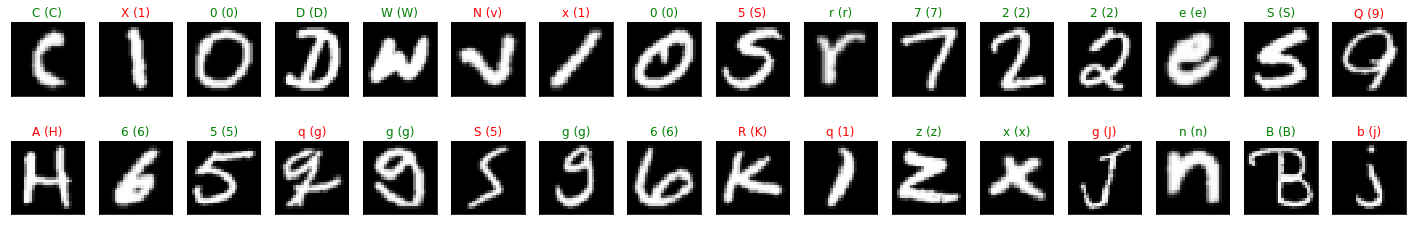

In [34]:
# obtain one batch of test images
rnd_index = np.random.randint(low=0, high=len(x_test), size=32)
images, labels = x_test[rnd_index], y_test[rnd_index]

# get sample outputs
predict = model_lenet.predict_on_batch(images)
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(labels, axis=1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(32):
    ax = fig.add_subplot(2, 32/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape((28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(classes[preds[idx]]), str(classes[labels[idx]])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Transfer Learning

In [0]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

In [0]:
import keras
from keras.applications.resnet50 import ResNet50
from keras_contrib.applications.resnet import ResNet18
#from keras.applications.resnet_v2 import ResNet50V2
#from keras.applications.resnext import ResNeXt50
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 4096
epochs = 10
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
callbacks = [es]
num_classes = 62
input_shape = (28, 28, 3)

In [0]:
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

In [0]:
#  split train dataset into train 98% and valid 2%
(x_train, x_valid, y_train, y_valid) = train_test_split(x_train, y_train, test_size=0.02,
                                                random_state=42)

print ('[INFO] Training shape: ', x_train.shape, y_train.shape)
print ('[INFO] Validation shape: ', x_valid.shape, y_valid.shape)
print ('[INFO] Test shape: ', x_test.shape, y_test.shape)

[INFO] Training shape:  (683973, 28, 28, 3) (683973, 62)
[INFO] Validation shape:  (13959, 28, 28, 3) (13959, 62)
[INFO] Test shape:  (116323, 28, 28, 3) (116323, 62)


In [0]:
dataset = dict({
    'x_train' : x_train,
    'y_train' : y_train,
    'x_valid' : x_valid,
    'y_valid' : y_valid,
    'x_test' : x_test,
    'y_test' : y_test
})

In [0]:
def train_generator(dataset, shuff_index, batch_size):
    num_iters = int(np.ceil(dataset['x_train'].shape[0] / batch_size))
    while 1:
        for i in range(num_iters):
            idx = shuff_index[i*batch_size:(i+1)*batch_size]
            tmp = dataset['x_train'][idx].astype('float32')
            tmp -= np.mean(dataset['x_train'], axis=0, keepdims=True)
            tmp /= 255.0
            yield tmp, dataset['y_train'][idx]

In [0]:
def valid_generator(dataset, batch_size):
    num_iters = int(np.ceil(dataset['x_valid'].shape[0] / batch_size))
    while 1:
        for i in range(num_iters):
            tmp = dataset['x_valid'][i*batch_size:(i+1)*batch_size].astype('float32')
            tmp -= np.mean(dataset['x_train'], axis=0, keepdims=True)
            tmp /= 255.0
            yield tmp, dataset['y_valid'][i*batch_size:(i+1)*batch_size]

In [0]:
#get the batches from generator
shuff_index = np.random.permutation(dataset['x_train'].shape[0])
trn_generator = train_generator(dataset, shuff_index, batch_size=batch_size)
val_generator = valid_generator(dataset, batch_size=batch_size)

iters_train = int(np.ceil(dataset['x_train'].shape[0] / float(batch_size)))
iters_test = int(np.ceil(dataset['x_valid'].shape[0] / float(batch_size)))

print ('Number:', iters_train, iters_test)

Number: 167 4


### Resnet50 Imagenet Pretrained Model

In [0]:
input_tensor = Input(shape=input_shape)
base_model = ResNet50(weights='imagenet', include_top=False, 
                      input_tensor=input_tensor)
#base_model = ResNet50V2(weights='imagenet', include_top=False)
#base_model = ResNeXt50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer with 62 classes
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

W0804 19:41:49.794712 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 19:41:49.798008 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 19:41:49.807011 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0804 19:41:49.832144 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0804 19:41:49.832957

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 34, 34, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# freeze all convolutional resnet layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

W0804 20:06:55.891784 140449134294912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#train the model using fit_generator
history = model.fit_generator(
            generator=trn_generator,
            steps_per_epoch=iters_train,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=val_generator,
            validation_steps=iters_test,
            use_multiprocessing=True,
            shuffle=True
        )

W0804 19:41:58.618039 140124642039680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
167/167 [==============================] - 324s 2s/step - loss: 1.4679 - acc: 0.6081 - val_loss: 6.1604 - val_acc: 0.0532
Epoch 2/10
167/167 [==============================] - 302s 2s/step - loss: 0.9676 - acc: 0.7107 - val_loss: 6.6290 - val_acc: 0.0511
Epoch 3/10
167/167 [==============================] - 310s 2s/step - loss: 0.8033 - acc: 0.7550 - val_loss: 7.2253 - val_acc: 0.0635
Epoch 4/10
167/167 [==============================] - 309s 2s/step - loss: 0.6772 - acc: 0.7922 - val_loss: 7.8741 - val_acc: 0.0624
Epoch 00004: early stopping


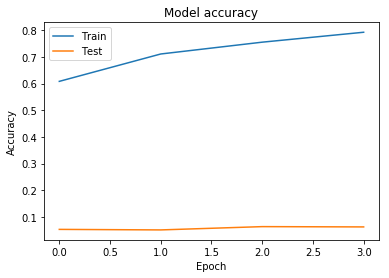

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### ResNet18 Scratch Model

In [0]:
base_model = ResNet18(input_shape, num_classes)

model = Model(inputs=base_model.input, outputs=base_model.output)
model.summary()

W0805 03:53:43.826295 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 03:53:43.830656 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 03:53:43.837222 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0805 03:53:43.869061 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0805 03:53:43.869916

reshaping via a convolution...
reshaping via a convolution...
reshaping via a convolution...
reshaping via a convolution...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 14, 14, 64)   0           batch_normalization

In [0]:
# freeze all convolutional resnet layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

W0805 03:54:09.518040 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#train the model using fit_generator
history = model.fit_generator(
            generator=trn_generator,
            steps_per_epoch=iters_train,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=val_generator,
            validation_steps=iters_test,
            use_multiprocessing=True,
            shuffle=True
        )

Epoch 1/10
167/167 [==============================] - 301s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 2/10
167/167 [==============================] - 282s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 3/10
167/167 [==============================] - 285s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 4/10
167/167 [==============================] - 282s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 00004: early stopping


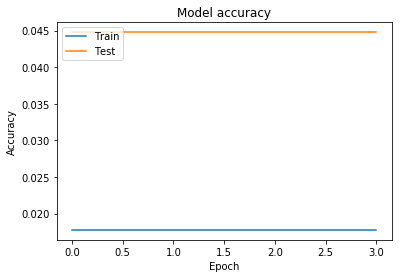

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()